In [37]:
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)

In [38]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

决策树


热编码

In [16]:
import pandas as pd
import category_encoders as ce
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
# 加载数据
data = pd.read_csv('data2.csv', encoding='utf-8')

In [15]:
# 分割数据为X (特征) 和 y (目标变量)
X = data[["母亲年龄", "婚姻状况", "教育程度", "妊娠时间（周数）", "分娩方式", "CBTS", "EPDS", "HADS"]]
y = data["婴儿行为特征"]

# 目标编码（Target Encoding）用于处理分类特征
cat_features = ["婚姻状况", "教育程度", "分娩方式"]
encoder = ce.TargetEncoder(cols=cat_features)
X_encoded = encoder.fit_transform(X, y)
# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 初始化XGBoost分类器
model = XGBClassifier()

# 在训练数据上训练模型
model.fit(X_train, y_train)

# 在测试数据上进行预测
y_pred = model.predict(X_test)

# 输出分类报告
print("目标编码分类报告：")
print(classification_report(y_test, y_pred))

目标编码分类报告：
              precision    recall  f1-score   support

           0       0.36      0.33      0.35        24
           1       0.53      0.67      0.59        36
           2       0.00      0.00      0.00        12

    accuracy                           0.44        72
   macro avg       0.30      0.33      0.31        72
weighted avg       0.39      0.44      0.41        72



In [56]:
# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 建立XGBoost模型
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()))

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 输出分类报告
print("热编码分类报告：")
print(classification_report(y_test, y_pred))

# 绘制特征重要性条形图



热编码分类报告：
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        26
           1       0.54      0.80      0.65        40
           2       0.33      0.10      0.15        10

    accuracy                           0.50        76
   macro avg       0.41      0.36      0.35        76
weighted avg       0.45      0.50      0.45        76



In [55]:
# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化XGBoost分类器
model = XGBClassifier()

# 在训练数据上训练模型
model.fit(X_train, y_train)

# 在测试数据上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

# 输出分类报告
print("直接分类报告：")
print(classification_report(y_test, y_pred))

准确率： 0.47368421052631576
直接分类报告：
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        26
           1       0.52      0.78      0.62        40
           2       0.00      0.00      0.00        10

    accuracy                           0.47        76
   macro avg       0.29      0.32      0.29        76
weighted avg       0.39      0.47      0.41        76



In [ ]:
# 因此热编码精度更高

下面全部使用热编码

1.xgboost

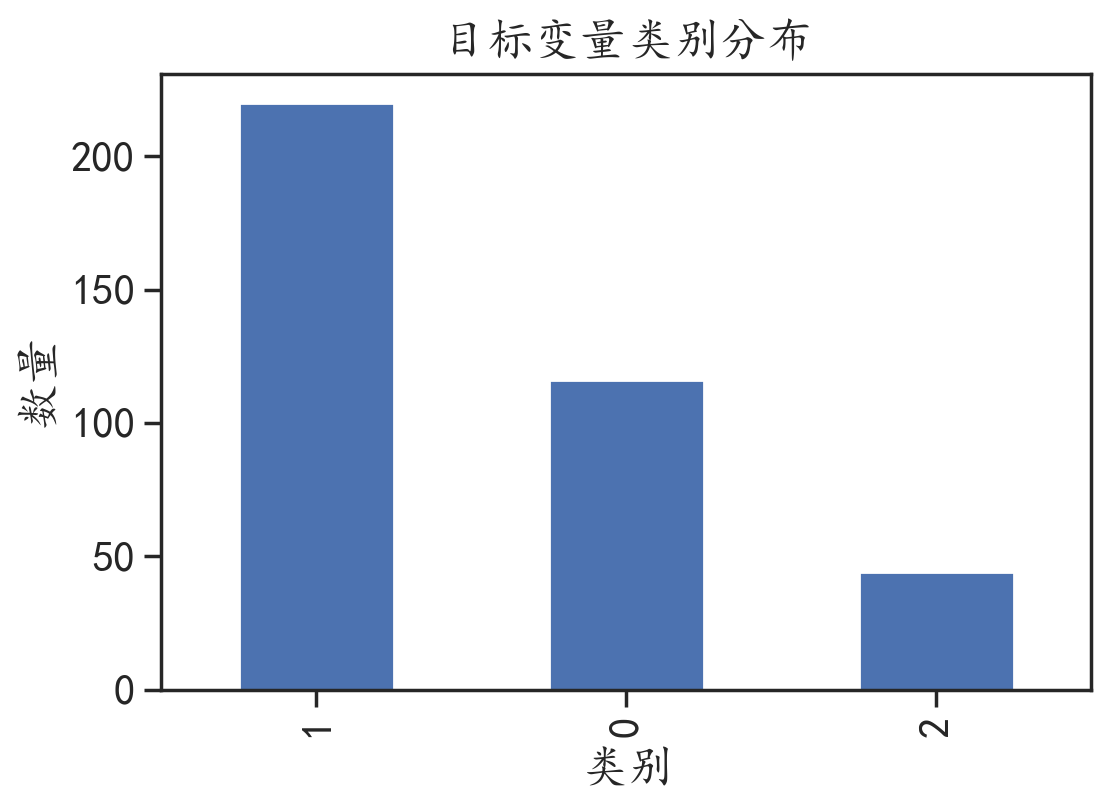

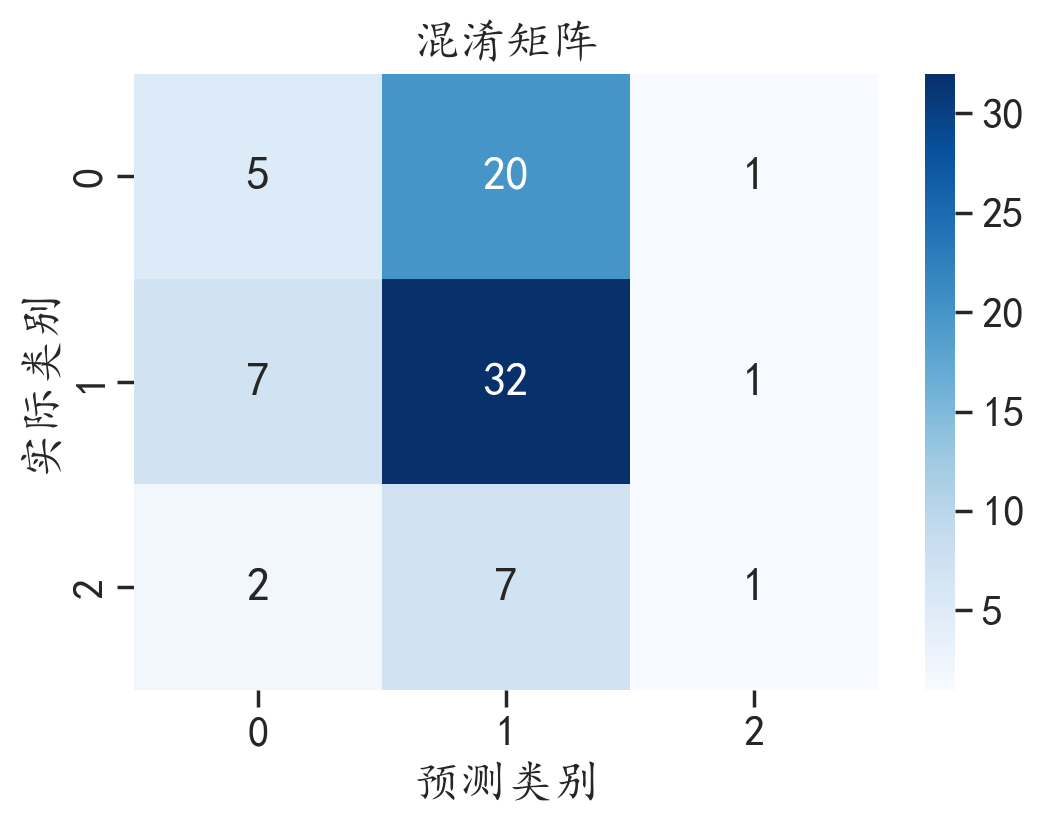

分类报告：
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        26
           1       0.54      0.80      0.65        40
           2       0.33      0.10      0.15        10

    accuracy                           0.50        76
   macro avg       0.41      0.36      0.35        76
weighted avg       0.45      0.50      0.45        76



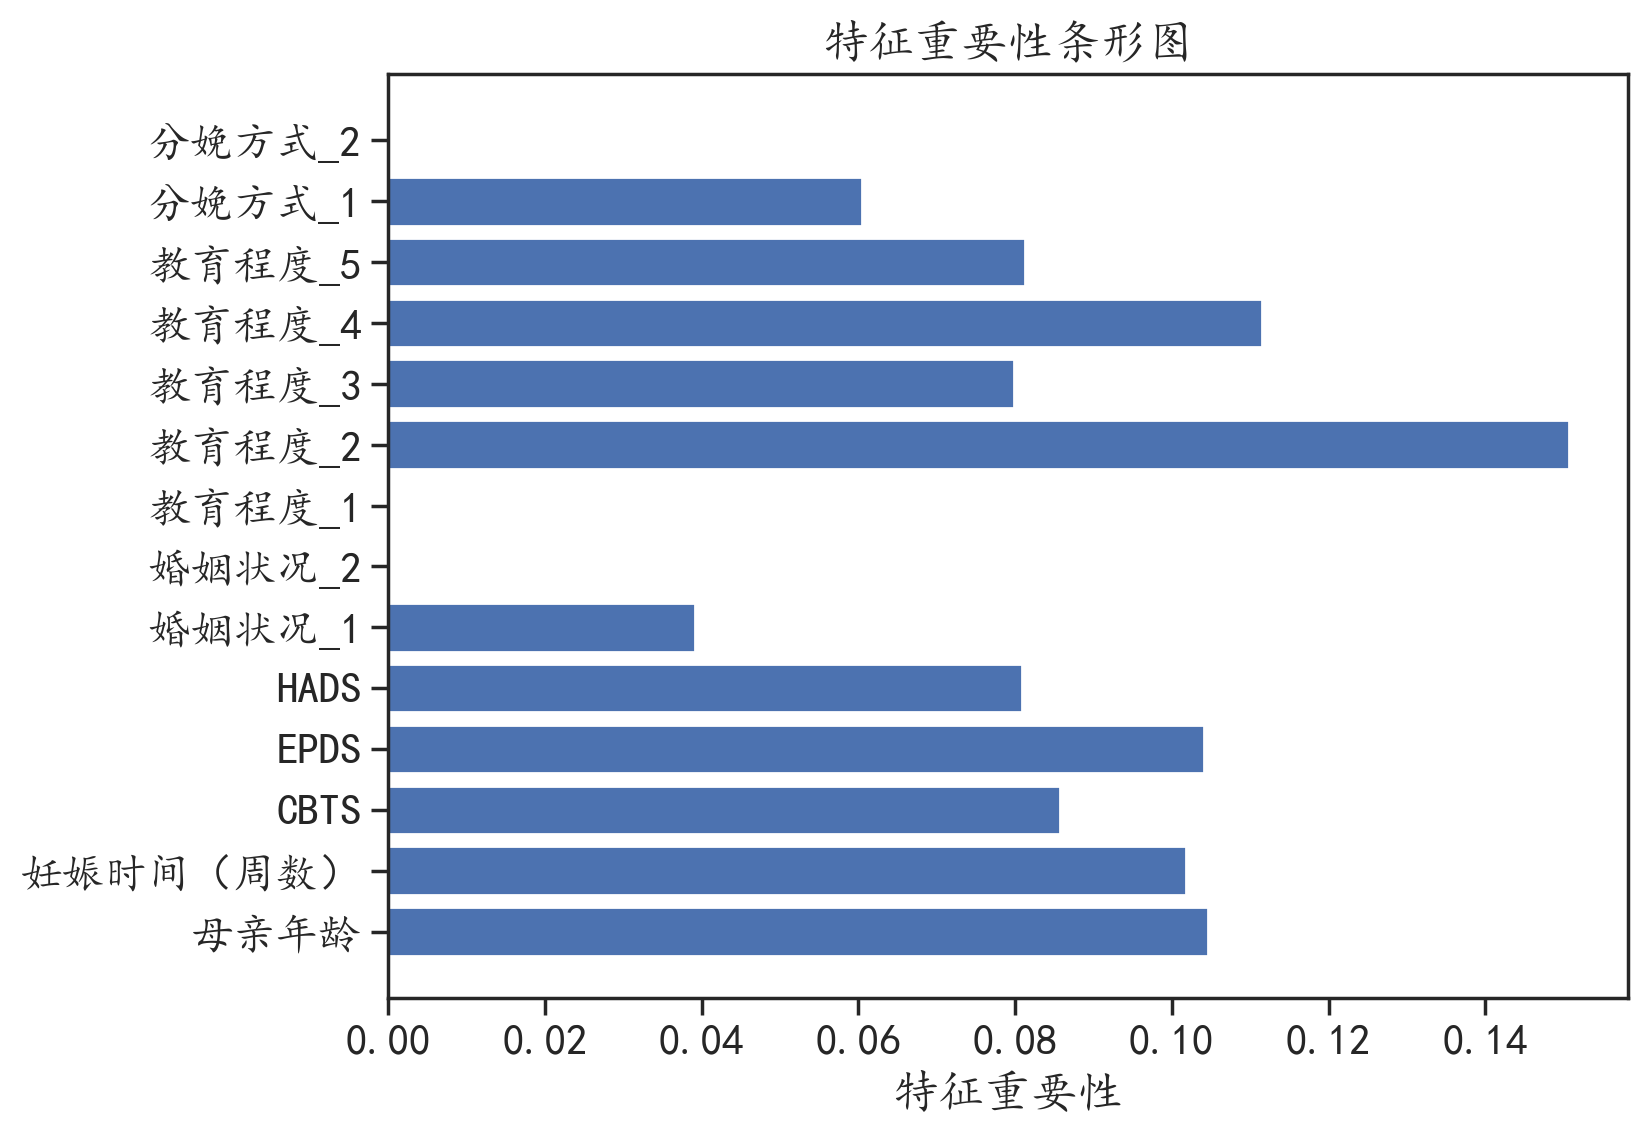

In [61]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# 读取数据
data = pd.read_csv('data2.csv')

# 自变量
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 因变量
y = data['婴儿行为特征']

# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 建立XGBoost模型
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()))

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 绘制目标变量类别分布（条形图）
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.xlabel("类别")
plt.ylabel("数量")
plt.title("目标变量类别分布")
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵（热图）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("预测类别")
plt.ylabel("实际类别")
plt.title("混淆矩阵")
plt.show()

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 绘制特征重要性条形图
plt.figure(figsize=(8, 6))
feat_importance = model.feature_importances_
feat_names = X_encoded.columns
plt.barh(feat_names, feat_importance)
plt.xlabel('特征重要性')
plt.title('特征重要性条形图')
plt.show()


2.决策树

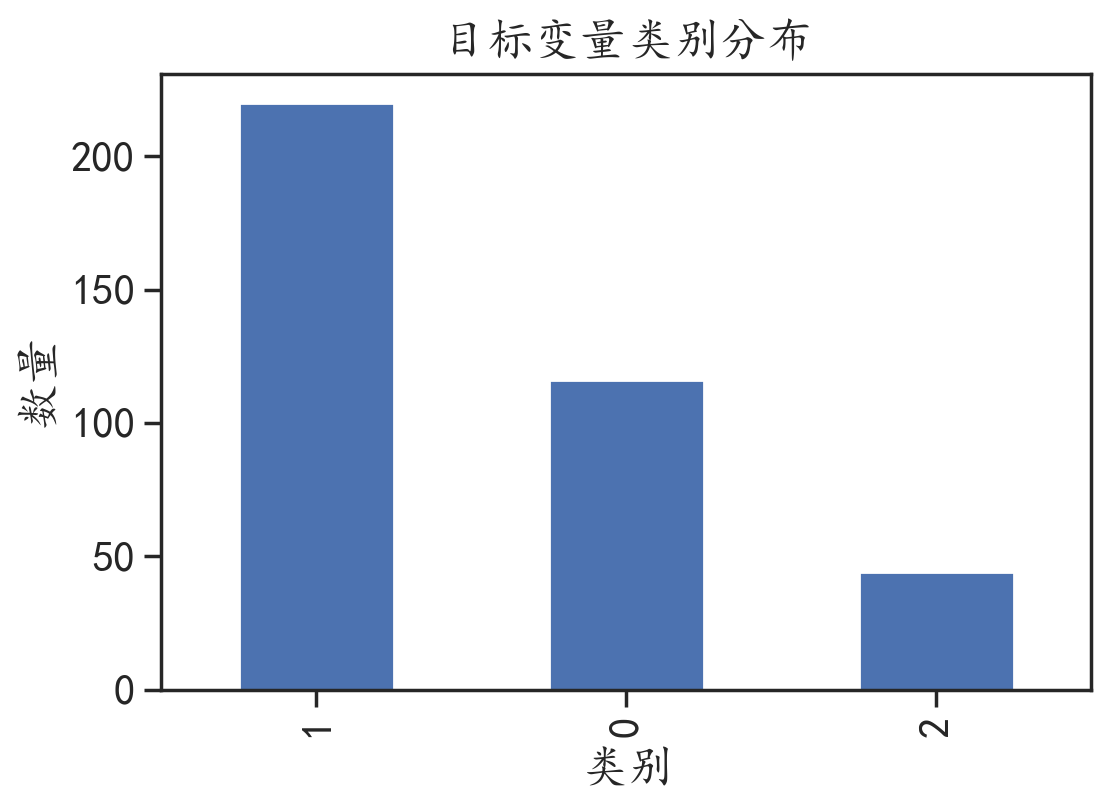

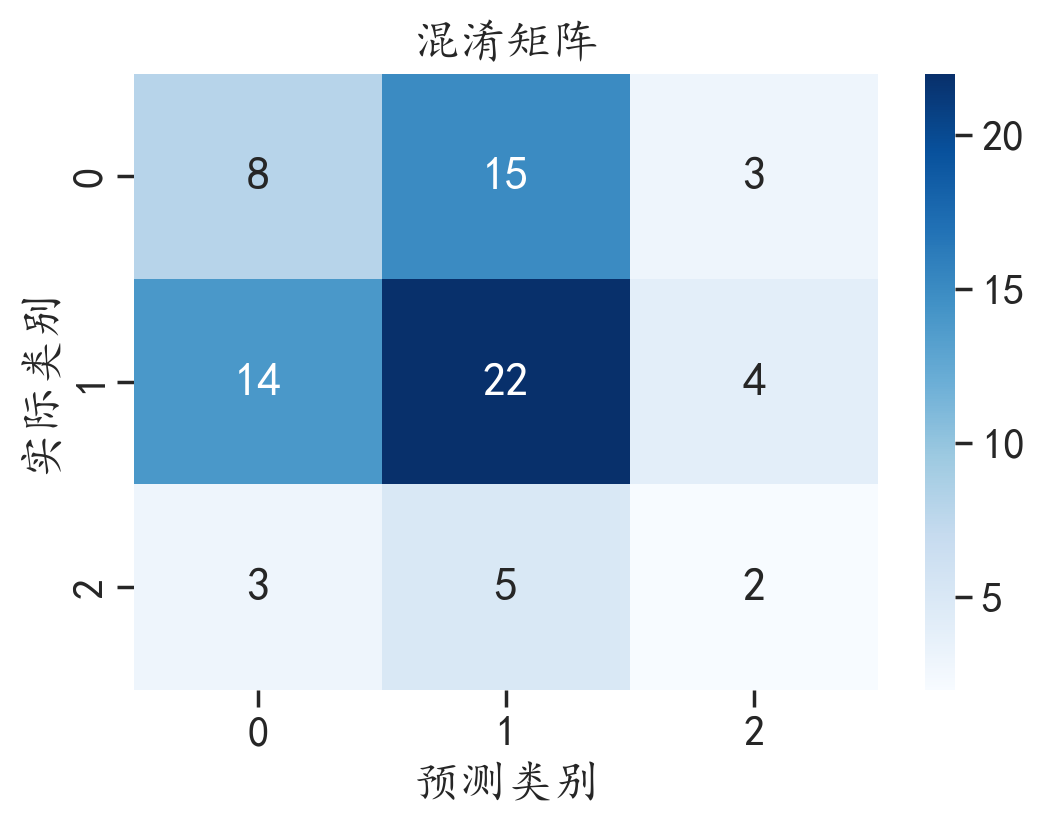

分类报告：
              precision    recall  f1-score   support

           0       0.32      0.31      0.31        26
           1       0.52      0.55      0.54        40
           2       0.22      0.20      0.21        10

    accuracy                           0.42        76
   macro avg       0.36      0.35      0.35        76
weighted avg       0.41      0.42      0.42        76



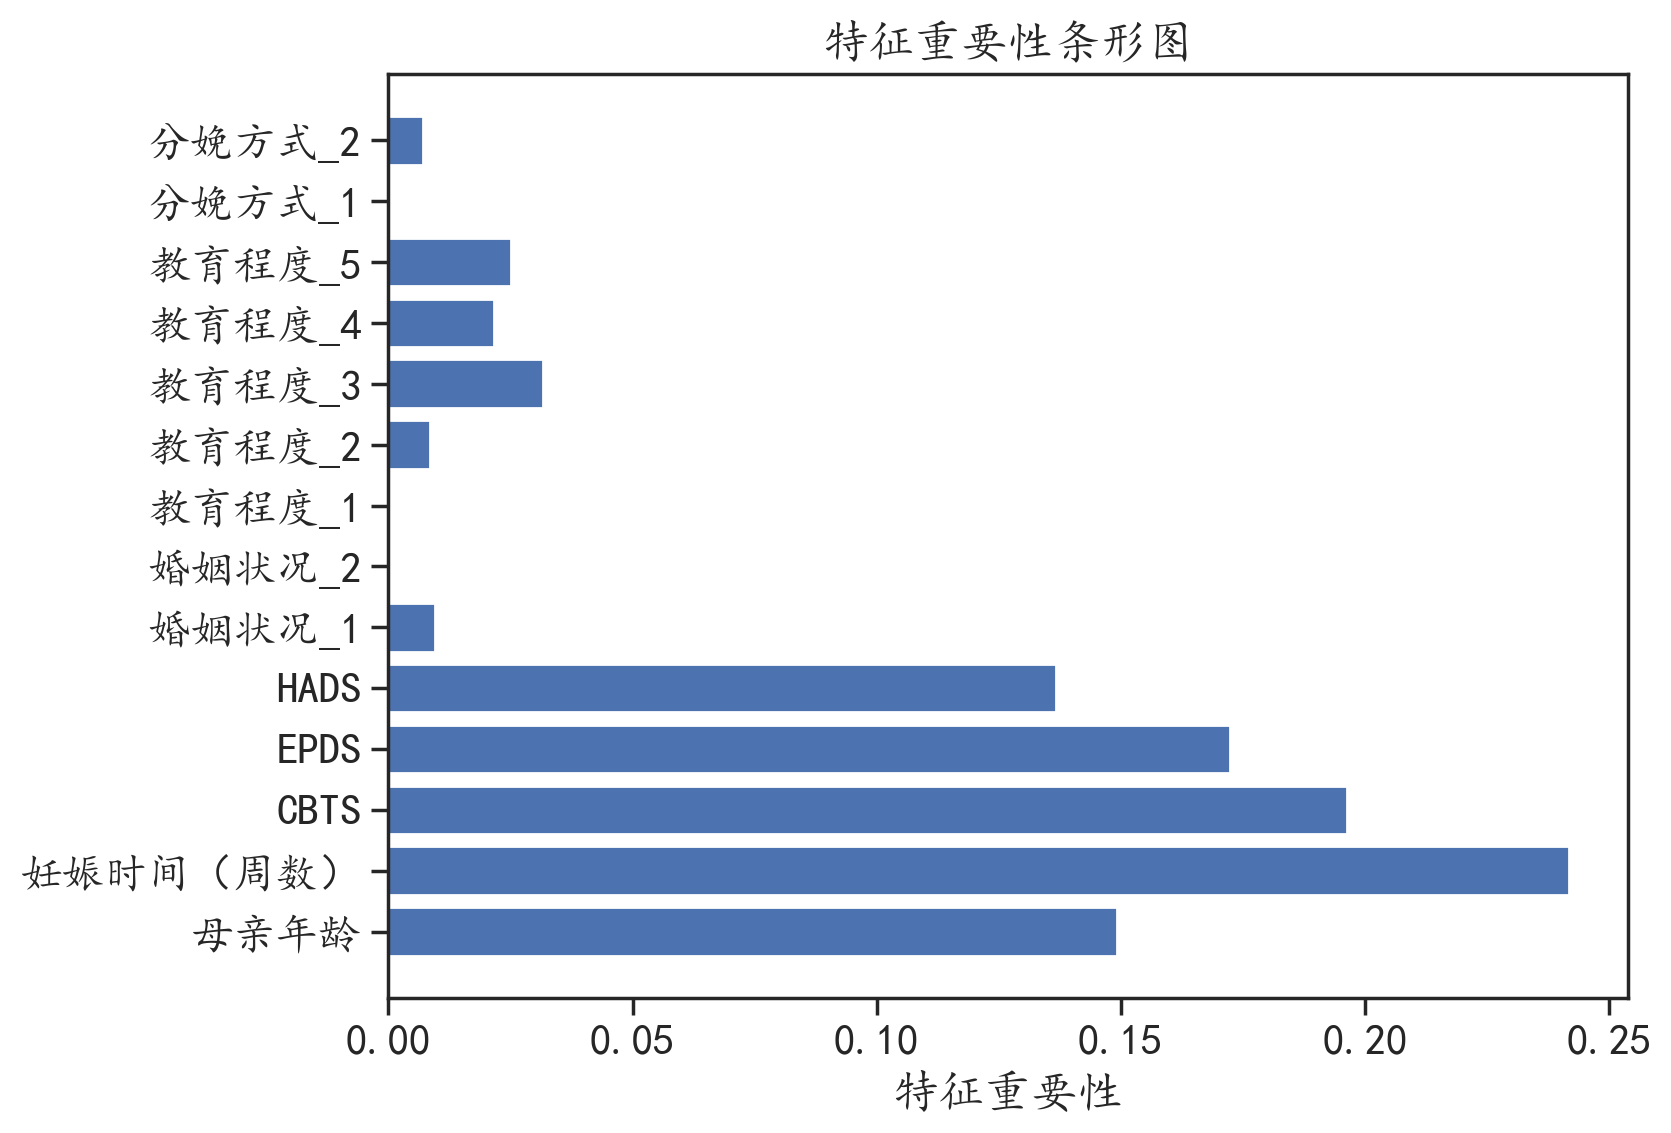

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 读取数据
data = pd.read_csv('data2.csv')

# 自变量
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 因变量
y = data['婴儿行为特征']

# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 建立决策树模型
model = DecisionTreeClassifier()

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 绘制目标变量类别分布（条形图）
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.xlabel("类别")
plt.ylabel("数量")
plt.title("目标变量类别分布")
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵（热图）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("预测类别")
plt.ylabel("实际类别")
plt.title("混淆矩阵")
plt.show()

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 绘制特征重要性条形图
plt.figure(figsize=(8, 6))
feat_importance = model.feature_importances_
feat_names = X_encoded.columns
plt.barh(feat_names, feat_importance)
plt.xlabel('特征重要性')
plt.title('特征重要性条形图')
plt.show()


3.随机森林

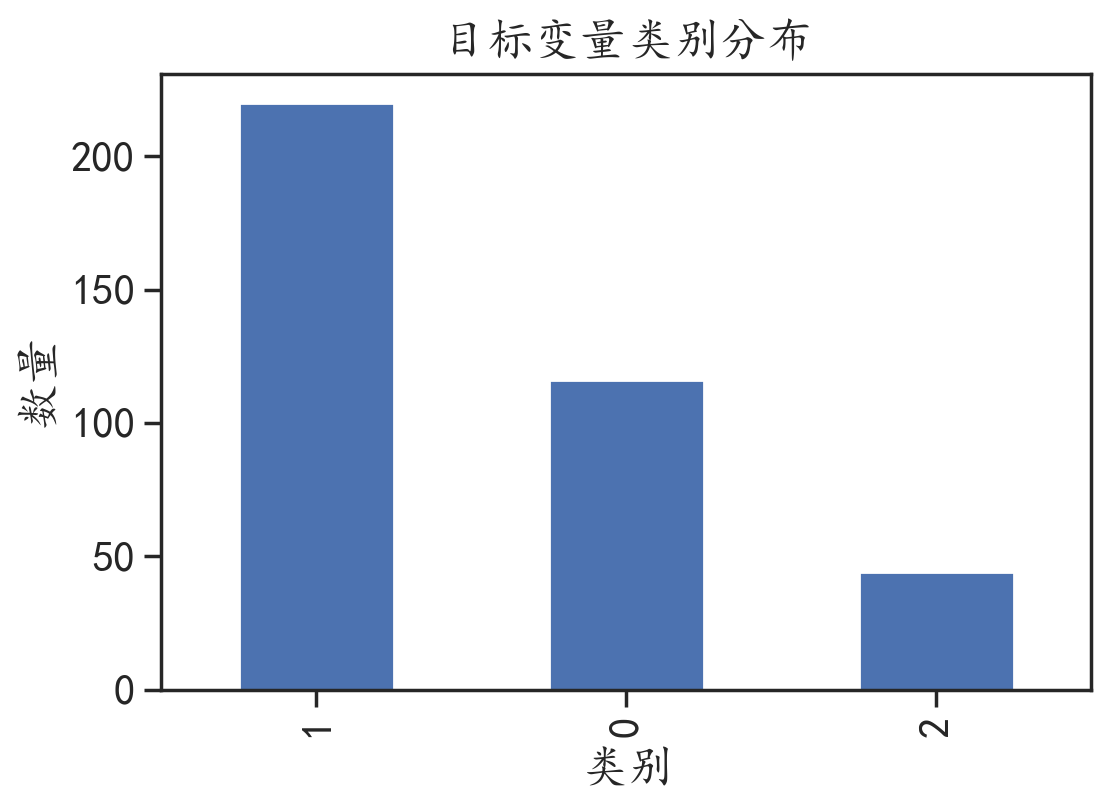

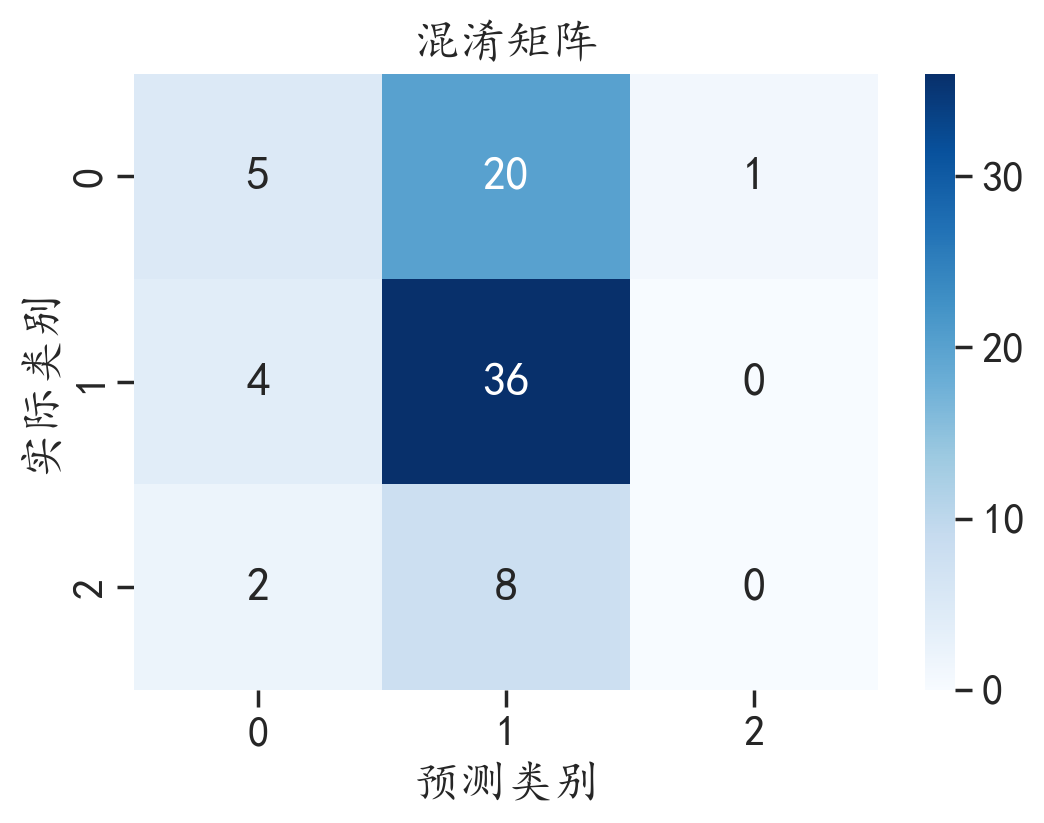

分类报告：
              precision    recall  f1-score   support

           0       0.45      0.19      0.27        26
           1       0.56      0.90      0.69        40
           2       0.00      0.00      0.00        10

    accuracy                           0.54        76
   macro avg       0.34      0.36      0.32        76
weighted avg       0.45      0.54      0.46        76



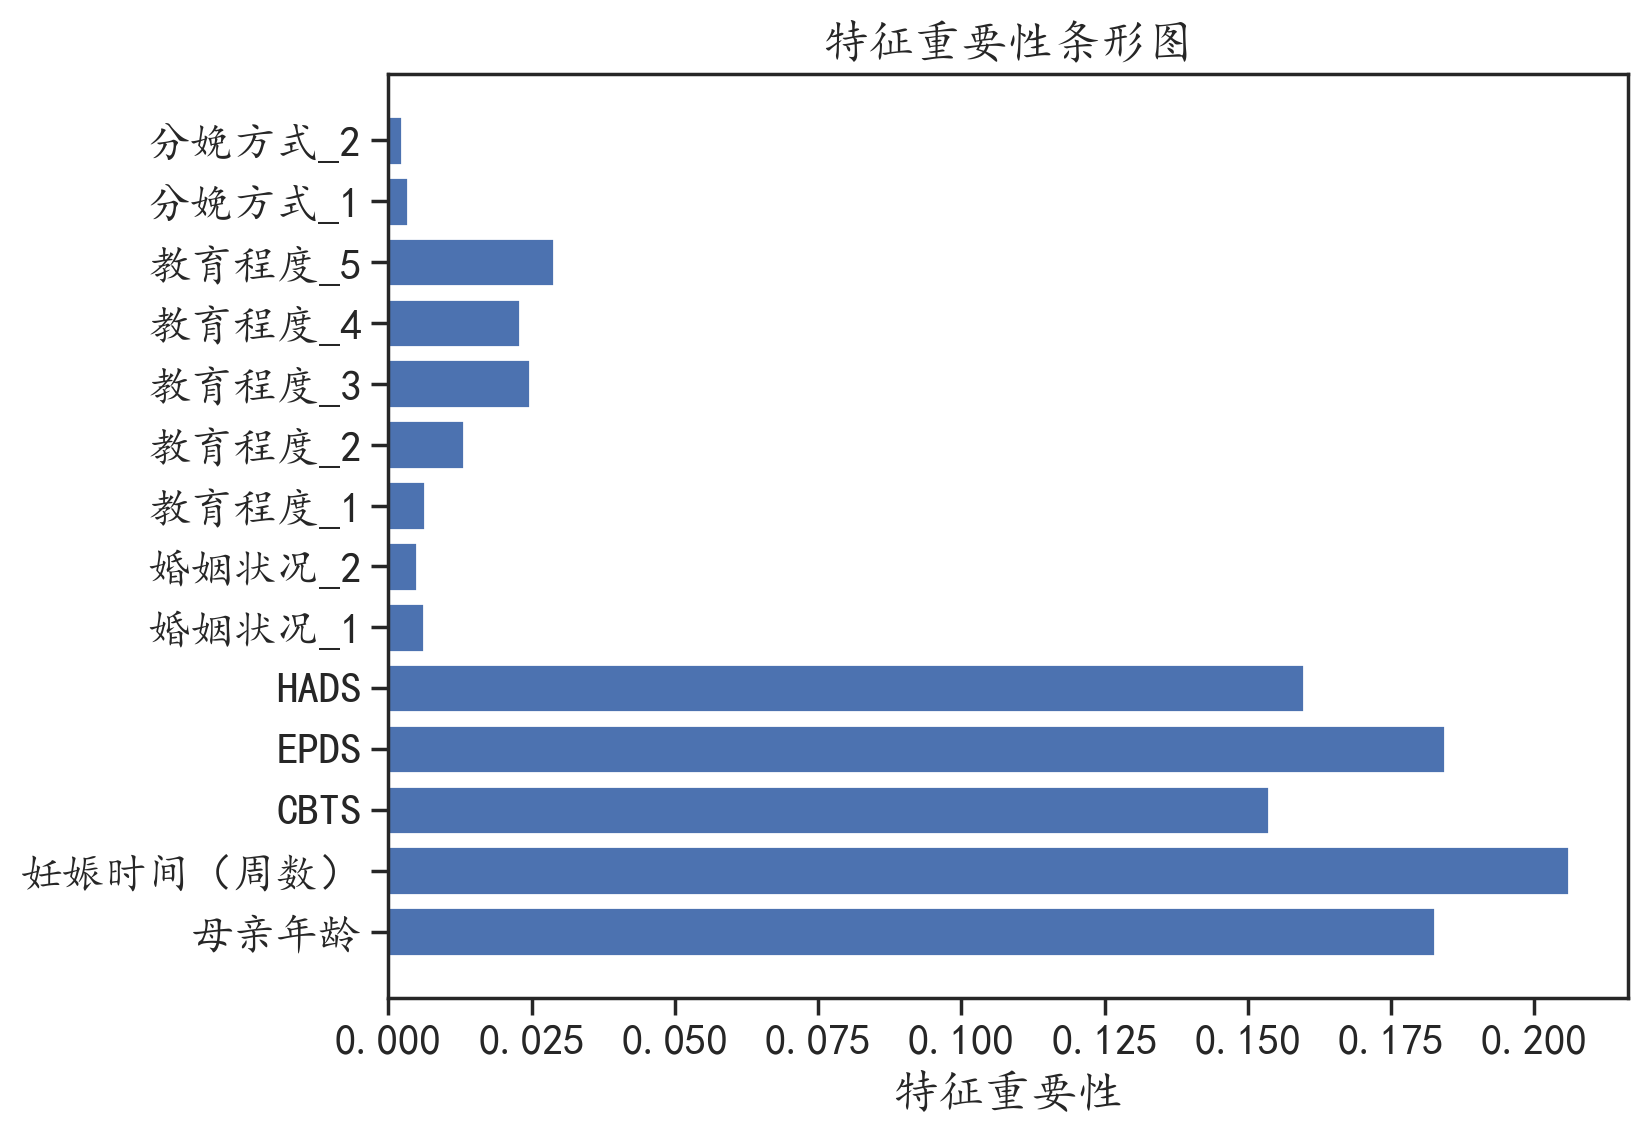

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 读取数据
data = pd.read_csv('data2.csv')

# 自变量
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 因变量
y = data['婴儿行为特征']

# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 建立随机森林模型
model = RandomForestClassifier()

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 绘制目标变量类别分布（条形图）
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.xlabel("类别")
plt.ylabel("数量")
plt.title("目标变量类别分布")
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵（热图）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("预测类别")
plt.ylabel("实际类别")
plt.title("混淆矩阵")
plt.show()

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 绘制特征重要性条形图
plt.figure(figsize=(8, 6))
feat_importance = model.feature_importances_
feat_names = X_encoded.columns
plt.barh(feat_names, feat_importance)
plt.xlabel('特征重要性')
plt.title('特征重要性条形图')
plt.show()


4.lightgbm

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 304, number of used features: 8
[LightGBM] [Info] Start training from score -1.217218
[LightGBM] [Info] Start training from score -0.524071
[LightGBM] [Info] Start training from score -2.190667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

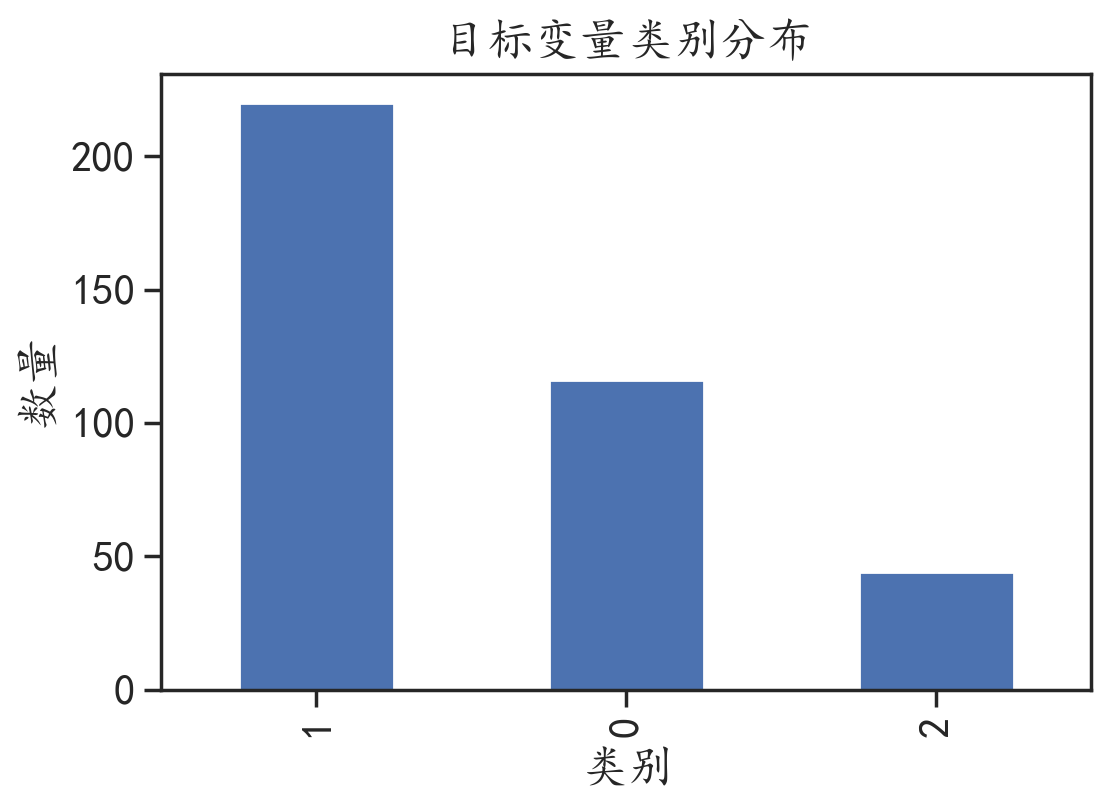

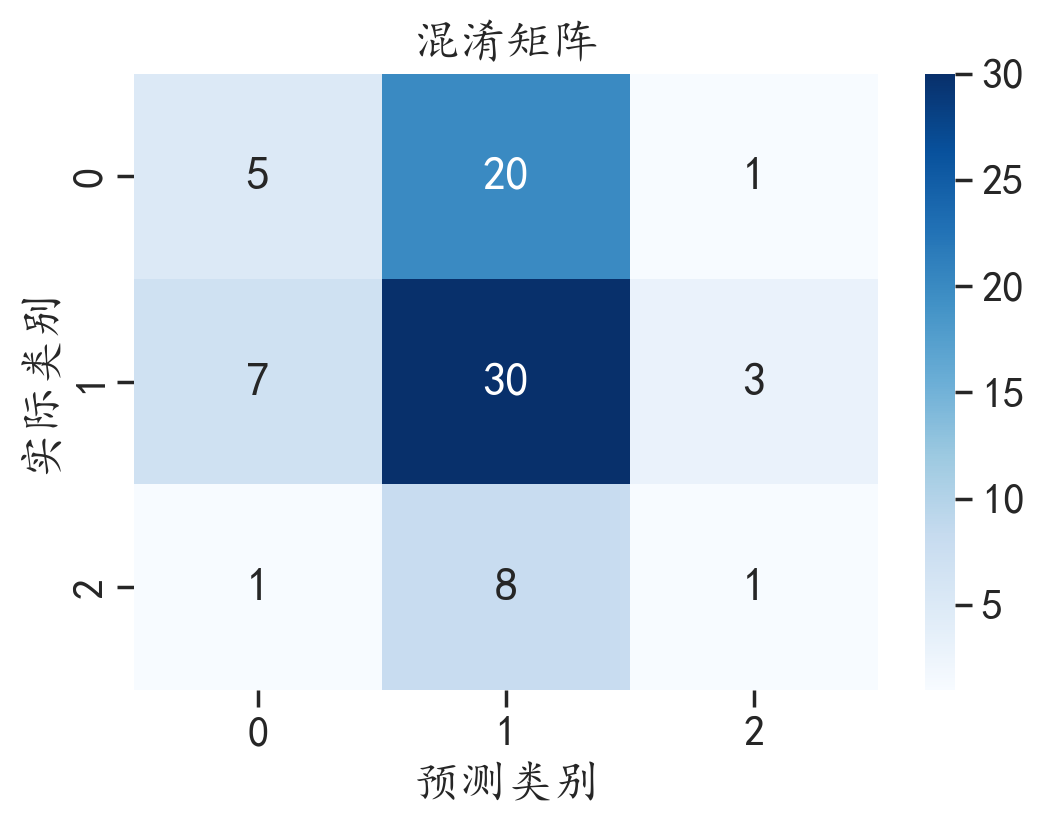

分类报告：
              precision    recall  f1-score   support

           0       0.38      0.19      0.26        26
           1       0.52      0.75      0.61        40
           2       0.20      0.10      0.13        10

    accuracy                           0.47        76
   macro avg       0.37      0.35      0.33        76
weighted avg       0.43      0.47      0.43        76



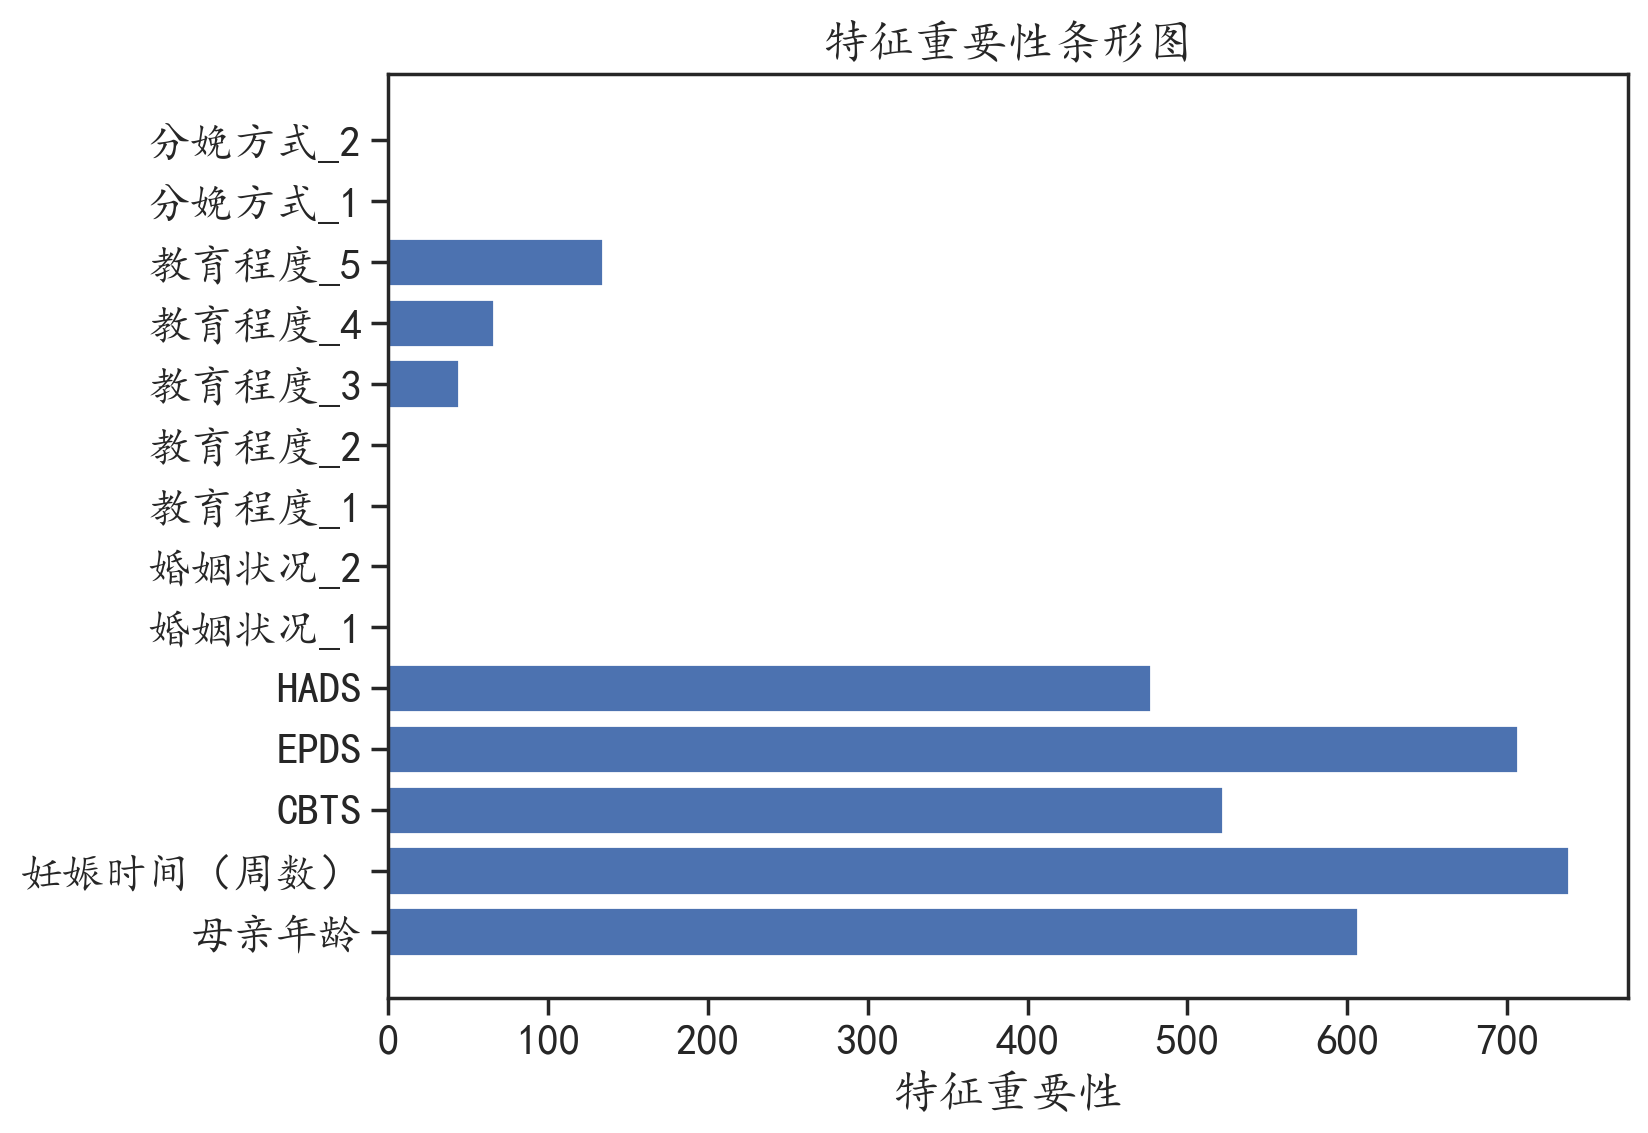

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 读取数据
data = pd.read_csv('data2.csv')

# 自变量
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 因变量
y = data['婴儿行为特征']

# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 建立LightGBM模型
model = LGBMClassifier()

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 绘制目标变量类别分布（条形图）
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.xlabel("类别")
plt.ylabel("数量")
plt.title("目标变量类别分布")
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵（热图）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("预测类别")
plt.ylabel("实际类别")
plt.title("混淆矩阵")
plt.show()

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 绘制特征重要性条形图
plt.figure(figsize=(8, 6))
feat_importance = model.feature_importances_
feat_names = X_encoded.columns
plt.barh(feat_names, feat_importance)
plt.xlabel('特征重要性')
plt.title('特征重要性条形图')
plt.show()


5.DP

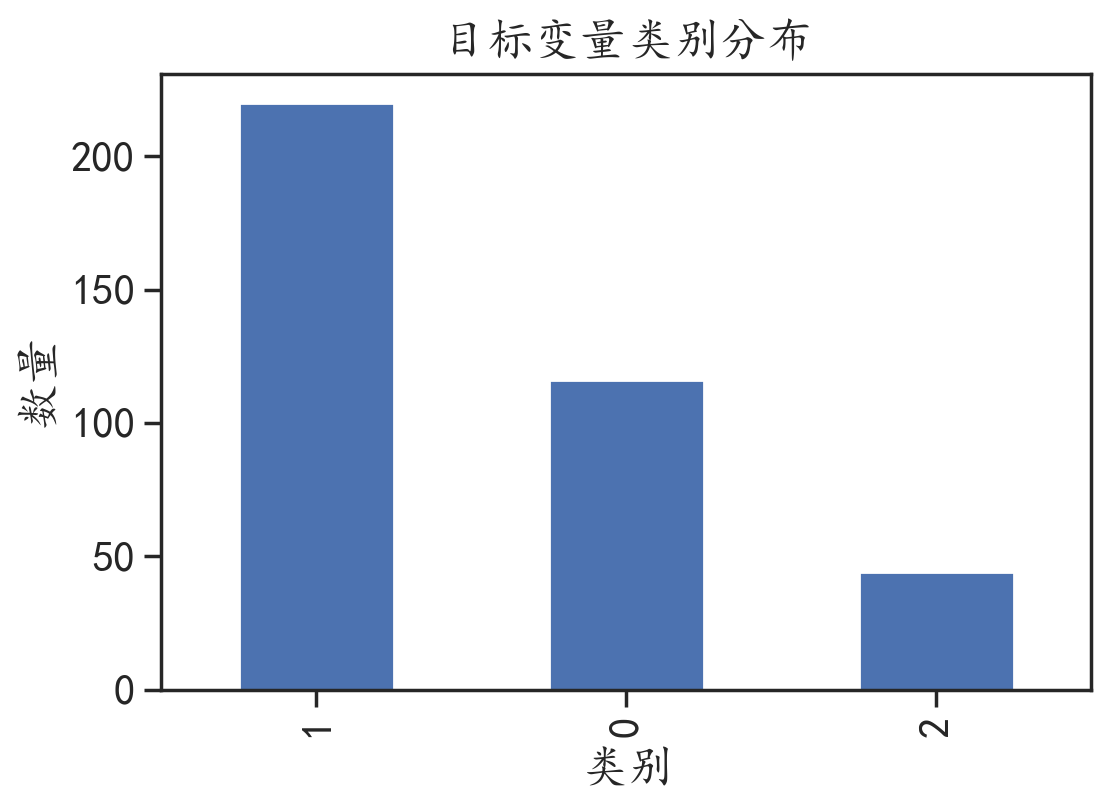

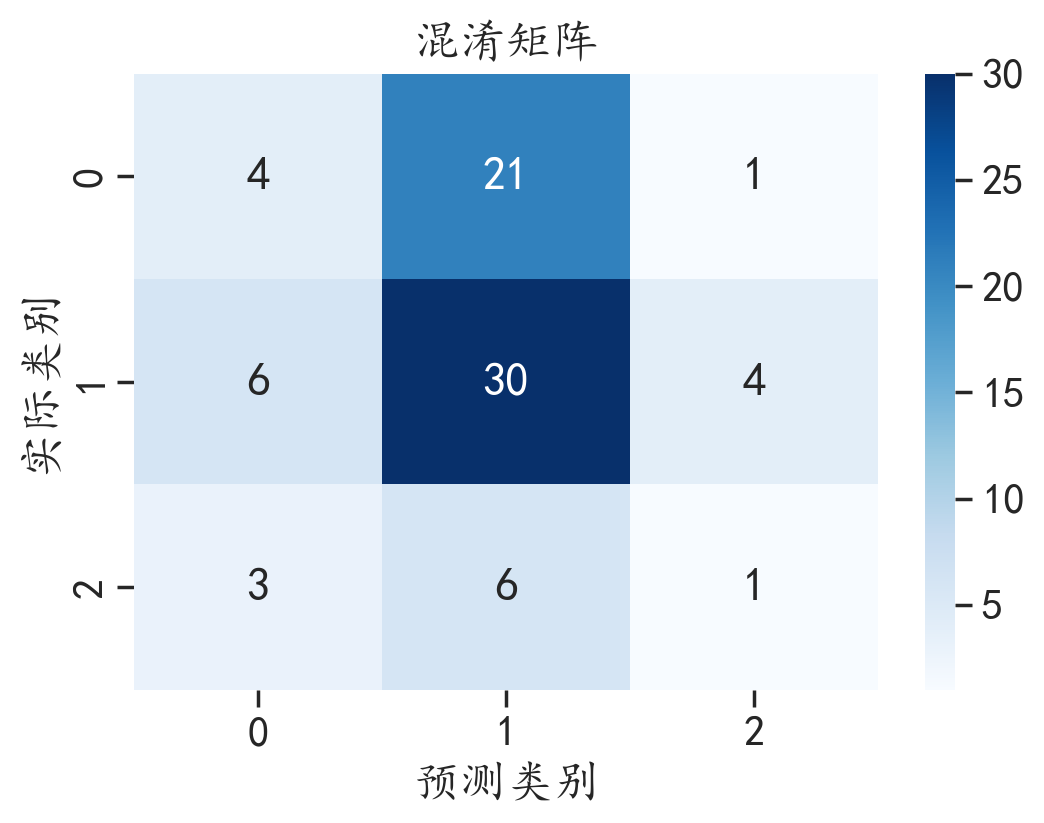

分类报告：
              precision    recall  f1-score   support

           0       0.31      0.15      0.21        26
           1       0.53      0.75      0.62        40
           2       0.17      0.10      0.12        10

    accuracy                           0.46        76
   macro avg       0.33      0.33      0.32        76
weighted avg       0.40      0.46      0.41        76



In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 读取数据
data = pd.read_csv('data2.csv')

# 自变量
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 因变量
y = data['婴儿行为特征']

# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 建立BP神经网络模型
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 绘制目标变量类别分布（条形图）
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.xlabel("类别")
plt.ylabel("数量")
plt.title("目标变量类别分布")
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵（热图）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("预测类别")
plt.ylabel("实际类别")
plt.title("混淆矩阵")
plt.show()

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 注意：BP神经网络没有内置特征重要性属性
# 不过你可以通过其他方法来评估特征的重要性


6.svc

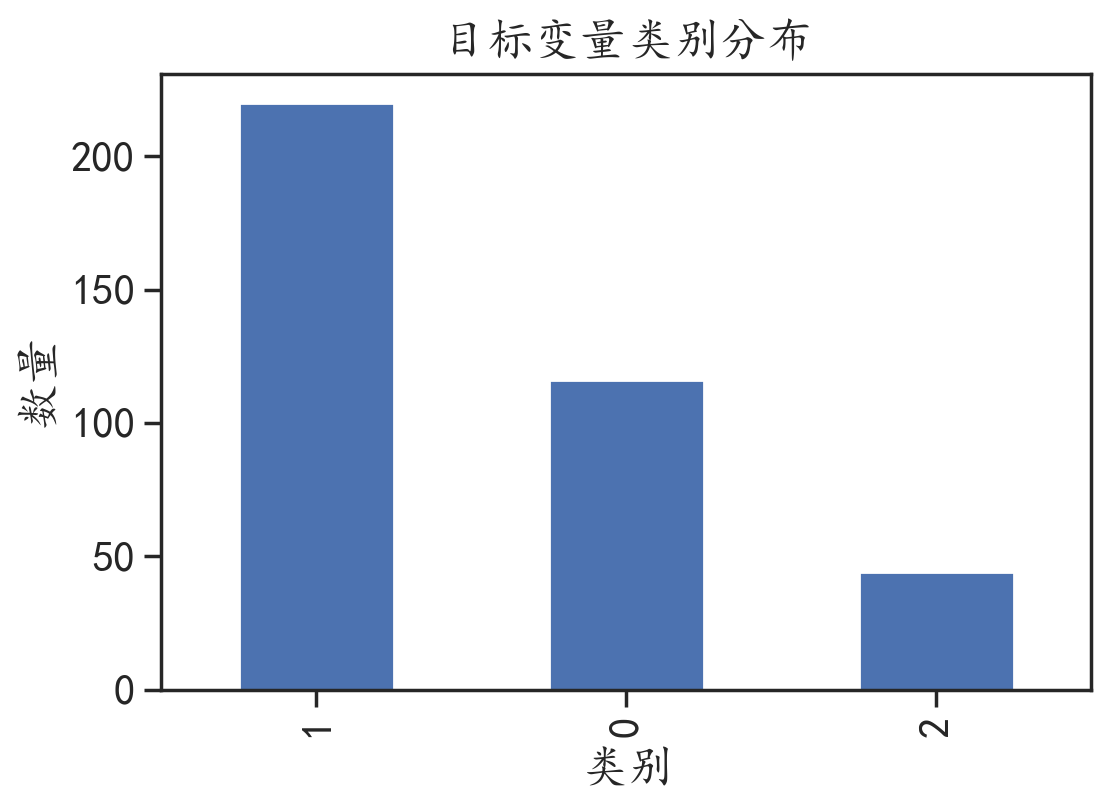

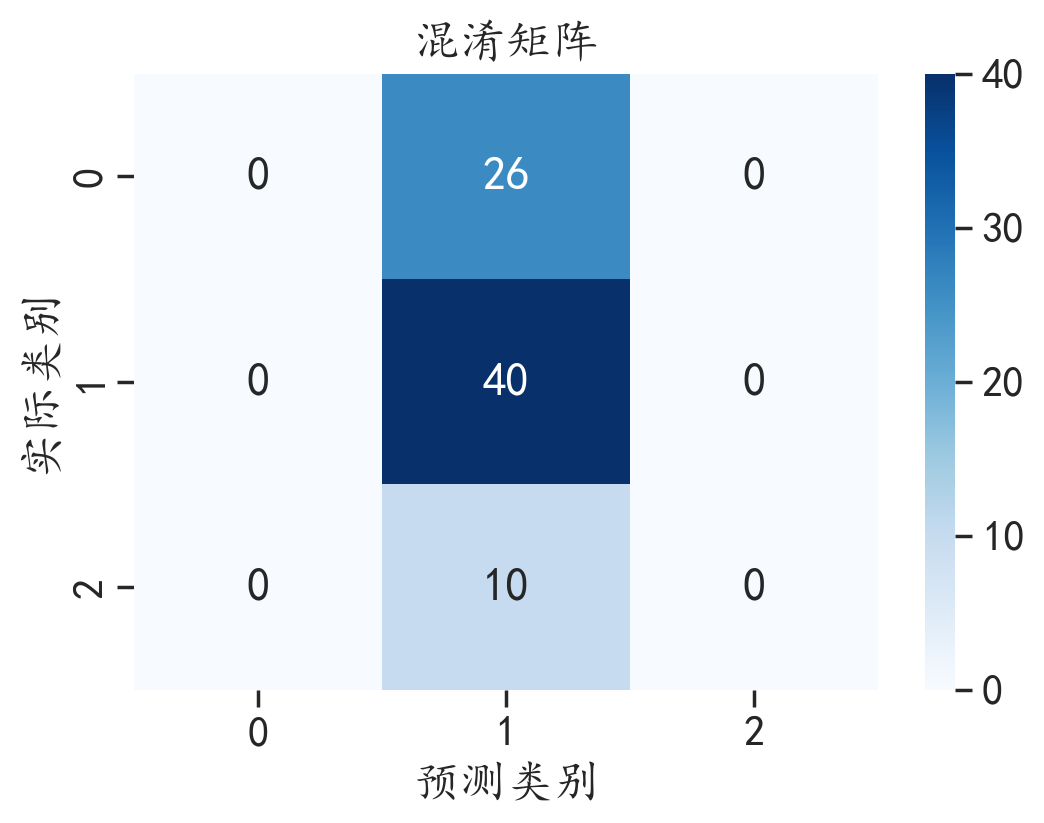

分类报告：
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.53      1.00      0.69        40
           2       0.00      0.00      0.00        10

    accuracy                           0.53        76
   macro avg       0.18      0.33      0.23        76
weighted avg       0.28      0.53      0.36        76



d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# 读取数据
data = pd.read_csv('data2.csv')

# 自变量
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 因变量
y = data['婴儿行为特征']

# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 建立SVM模型
model = SVC()

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 绘制目标变量类别分布（条形图）
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.xlabel("类别")
plt.ylabel("数量")
plt.title("目标变量类别分布")
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵（热图）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("预测类别")
plt.ylabel("实际类别")
plt.title("混淆矩阵")
plt.show()

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 注意：SVM没有内置特征重要性属性
# 不过你可以通过其他方法来评估特征的重要性
